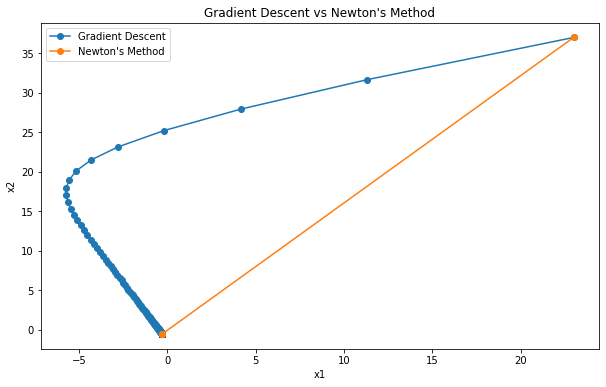

Gradient Descent Result: [-0.29069774 -0.51162771]
Number of Gradient Descent Iterations: 398
Newton's Method Result: [-0.29069767 -0.51162791]
Number of Newton's Method Iterations: 2


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, df, initial_point, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    trajectory = [x]

    for _ in range(max_iterations):
        gradient = df(x)
        x = x - learning_rate * gradient

        trajectory.append(x)

        if np.linalg.norm(gradient) < epsilon:
            break

    return x, trajectory

def newtons_method(f, df, d2f, initial_point, epsilon=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    trajectory = [x]

    for _ in range(max_iterations):
        gradient = df(x)
        hessian_inv = np.linalg.inv(d2f(x))

        x = x - np.dot(hessian_inv, gradient)

        trajectory.append(x)

        if np.linalg.norm(gradient) < epsilon:
            break

    return x, trajectory

def plot_trajectory(trajectory, title):
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', label=title)
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', color='black')  # Mark the final point
    plt.legend()

# Given function f(z) = 1/2 * x^T * Q * x + q^T * x + p
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2

def quadratic_function(x):
    return 0.5 * np.dot(np.dot(x, Q), x) + np.dot(q, x) + p

def gradient_quadratic_function(x):
    return np.dot(Q, x) + q

def hessian_quadratic_function(x):
    return Q

# Analysis function
def perform_analysis(f, df, d2f, initial_point):
    # Run gradient descent
    result_gd, trajectory_gd = gradient_descent(f, df, initial_point)
    
    # Run Newton's method
    result_newton, trajectory_newton = newtons_method(f, df, d2f, initial_point)

    # Plotting the trajectory
    plt.figure(figsize=(10, 6))
    plot_trajectory(trajectory_gd, 'Gradient Descent')
    plot_trajectory(trajectory_newton, "Newton's Method")
    plt.title('Gradient Descent vs Newton\'s Method')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

    # Display results
    print("Gradient Descent Result:", result_gd)
    print("Number of Gradient Descent Iterations:", len(trajectory_gd) - 1)
    print("Newton's Method Result:", result_newton)
    print("Number of Newton's Method Iterations:", len(trajectory_newton) - 1)

# Example usage
initial_point = [23.0,37.0]
perform_analysis(quadratic_function, gradient_quadratic_function, hessian_quadratic_function, initial_point)


قسمت 1

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def gradient_descent(Q, q, p, initial_x, tolerance=1e-6, max_iterations=1000):
    x = initial_x
    iteration = 0
    x_trajectory = [x]
    convergence = []

    start_time = time.time()

    while iteration < max_iterations:
        # Compute the gradient
        gradient = Q @ x + q

        # Check for convergence
        if np.linalg.norm(gradient) < tolerance:
            break

        # Compute the step size
        numerator = (Q @ x + q).T @ (Q @ x + q)
        denominator = (Q @ x + q).T @ Q @ (Q @ x + q)
        alpha = numerator / denominator

        # Update the parameter vector
        x = x - alpha * gradient

        # Save the trajectory for visualization
        x_trajectory.append(x)

        # Track convergence for each iteration
        convergence.append(np.linalg.norm(gradient))

        iteration += 1

    end_time = time.time()

    return x, x_trajectory, convergence, iteration, end_time - start_time

# Given values
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2
initial_x = np.zeros_like(q)

# Call the gradient descent function
result, trajectory, convergence, num_iterations, elapsed_time = gradient_descent(Q, q, p, initial_x)

# Print the result
print("Minimum point x:", result)
print("Convergence:", convergence)
print("Number of iterations:", num_iterations)
print("Time taken:", elapsed_time, "seconds")


Minimum point x: [-0.29069769 -0.51162788]
Convergence: [16.55294535724685, 1.583154900071923, 1.1242022350437502, 0.10752082113906841, 0.07635080271222106, 0.007302334710200272, 0.005185406053354031, 0.0004959420106243732, 0.00035216965615288495, 3.368216983422048e-05, 2.391779263197243e-05, 2.2875427781334857e-06, 1.624389822523249e-06]
Number of iterations: 13
Time taken: 0.008813619613647461 seconds


<ipython-input-30-ee087950b447>:19: RuntimeWarning: overflow encountered in matmul
  alpha = -gradient.T @ gradient / (gradient.T @ Q @ gradient)


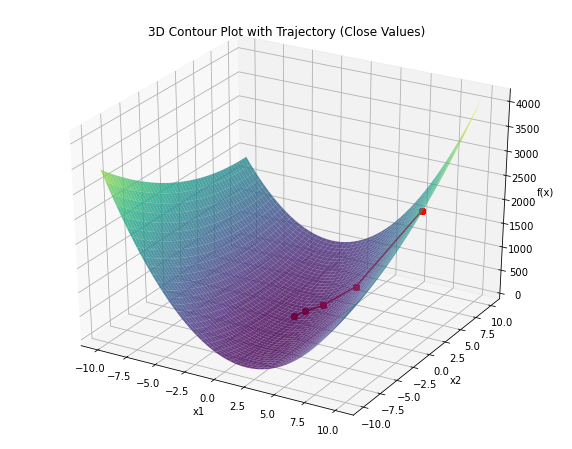

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(Q, q, p, initial_x, learning_rate=0.01, tolerance=1e-6, max_iterations=1000):
    x = initial_x
    iteration = 0
    x_trajectory = [x]

    while iteration < max_iterations:
        # Compute the gradient
        gradient = Q @ x + q

        # Check for convergence
        if np.linalg.norm(gradient) < tolerance:
            break

        # Compute the optimal step length analytically
        alpha = -gradient.T @ gradient / (gradient.T @ Q @ gradient)

        # Update the parameter vector
        x = x - alpha * gradient

        # Save the trajectory for visualization
        x_trajectory.append(x)

        iteration += 1

    return x, np.array(x_trajectory)

def plot_3d_contour_with_trajectory(Q, q, p, x_trajectory, threshold=1.0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Generate a meshgrid for 3D plot
    x_range = np.linspace(-10, 10, 400)
    y_range = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x_range, y_range)

    # Compute the function values for 3D plot
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[0, 1] + Q[1, 0]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    # Plot 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # Extract coordinates for the trajectory
    x_vals, y_vals = x_trajectory[:, 0], x_trajectory[:, 1]
    z_vals = 0.5 * (Q[0, 0] * x_vals**2 + (Q[0, 1] + Q[1, 0]) * x_vals * y_vals + Q[1, 1] * y_vals**2) + q[0] * x_vals + q[1] * y_vals + p

    # Find indices where trajectory values are close to the function values
    # Find indices where trajectory values are close to the function values
    close_indices = np.where(np.abs(z_vals[:, np.newaxis, np.newaxis] - Z) < threshold)[0]


    # Plot only the close trajectory values
    ax.plot(x_vals[close_indices], y_vals[close_indices], z_vals[close_indices], '-ro', label='Trajectory (Close Values)')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    ax.set_title('3D Contour Plot with Trajectory (Close Values)')

    plt.show()

# Given values
Q = np.array([[48, 12], [8, 8]])
q = np.array([13, 23])
p = 4
initial_x = np.zeros_like(q)

# Call the gradient descent function to find the minimum point and trajectory
result, trajectory = gradient_descent(Q, q, p, initial_x)


# Plot 3D contour with trajectory (only close values)
plot_3d_contour_with_trajectory(Q, q, p, trajectory, threshold=1.0)


Minimum point : [-0.29041975 -0.51118029]
Number of iterations: 7


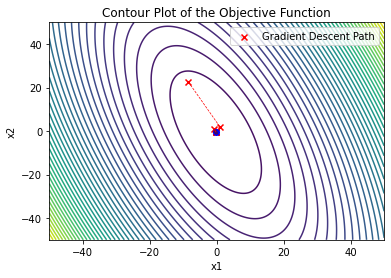

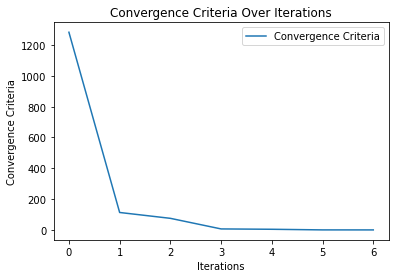

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, Q, q, p):
    return 0.5 * np.dot(x, np.dot(Q, x)) + np.dot(q, x) + p

def gradient(x, Q, q):
    return np.dot(Q, x) + q

def gradient_descent(initial_x, Q, q, p, max_iterations, tolerance):
    x = initial_x
    iterations = 0
    history = []

    for i in range(max_iterations):
        gradient = Q @ x + q

        # Compute the step size
        numerator = (Q @ x + q).T @ (Q @ x + q)
        denominator = (Q @ x + q).T @ Q @ (Q @ x + q)
        alpha = numerator / denominator
        
        x = x - alpha * gradient


        # Convergence check based on the norm of the gradient
        if np.linalg.norm(gradient) < tolerance:
            break

        # Store the history for contour plotting
        history.append(x.copy())
        iterations += 1

    return x, iterations, history

# Given values
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2
initial_x = np.array([23, 37])

# Convergence criteria
tolerance = 0.1

# Maximum number of iterations
max_iterations = 1000

# Perform gradient descent with different step sizes
min_point1, iterations1, history1 = gradient_descent(initial_x, Q, q, p, max_iterations, tolerance)
min_point2, iterations2, history2 = gradient_descent(initial_x, Q, q, p, max_iterations, tolerance)

print("Minimum point :", min_point1)
print("Number of iterations:", iterations1)

# Contour plotting
def plot_contour(Q, q, p, history):
    x = np.linspace(-50, 50, 400)
    y = np.linspace(-50, 50, 400)
    X, Y = np.meshgrid(x, y)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[0, 1] + Q[1, 0]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.scatter(*zip(*history), color='red', marker='x', label='Gradient Descent Path')
    plt.plot(*zip(*history), color='red', linestyle='dashed', linewidth=0.7)
    plt.scatter(*min_point1, color='blue', marker='o')
    plt.title('Contour Plot of the Objective Function')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Plot contours and the optimization path
plot_contour(Q, q, p, history1)

iterations_range = range(iterations1)
convergence_criteria_range = range(len(convergence_criteria1))

plt.plot(iterations_range, convergence_criteria1[:len(iterations_range)], label='Convergence Criteria')
plt.title('Convergence Criteria Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Convergence Criteria')
plt.legend()
plt.show()

قسمت 2

Minimum point (step size = 0.001 ): [-0.38052461 -0.24752577]
Number of iterations: 1000
Minimum point (step size = 0.01 ): [-0.29069774 -0.51162771]
Number of iterations: 397


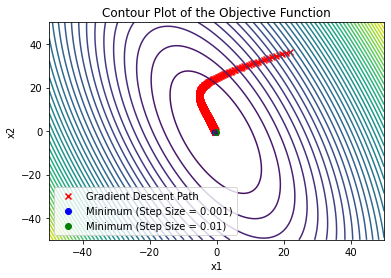

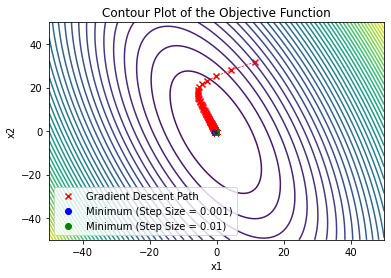

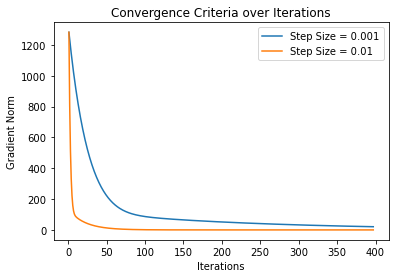

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, Q, q, p):
    return 0.5 * np.dot(x, np.dot(Q, x)) + np.dot(q, x) + p

def gradient(x, Q, q):
    return np.dot(Q, x) + q

def gradient_descent(initial_x, Q, q, p, step_size, max_iterations, tolerance):
    x = initial_x
    iterations = 0
    history = []
    gradient_norms = []

    for i in range(max_iterations):
        grad = gradient(x, Q, q)
        x = x - step_size * grad

        # Convergence check based on the norm of the gradient
        gradient_norm = np.linalg.norm(grad)
        gradient_norms.append(gradient_norm)

        if gradient_norm < tolerance:
            break

        # Store the history for contour plotting
        history.append(x.copy())
        iterations += 1

    return x, iterations, history, gradient_norms

# Given values
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2
initial_x = np.array([23, 37])

# Convergence criteria
tolerance = 1e-6

# Maximum number of iterations
max_iterations = 1000

# Step sizes
step_size1 = 0.001
step_size2 = 0.01

# Perform gradient descent with different step sizes
min_point1, iterations1, history1, gradient_norms1 = gradient_descent(initial_x, Q, q, p, step_size1, max_iterations, tolerance)
min_point2, iterations2, history2, gradient_norms2 = gradient_descent(initial_x, Q, q, p, step_size2, max_iterations, tolerance)

print("Minimum point (step size =", step_size1, "):", min_point1)
print("Number of iterations:", iterations1)
print("Minimum point (step size =", step_size2, "):", min_point2)
print("Number of iterations:", iterations2)

# Contour plotting
def plot_contour(Q, q, p, history):
    x = np.linspace(-50, 50, 400)
    y = np.linspace(-50, 50, 400)
    X, Y = np.meshgrid(x, y)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[0, 1] + Q[1, 0]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.scatter(*zip(*history), color='red', marker='x', label='Gradient Descent Path')
    plt.plot(*zip(*history), color='red', linestyle='dashed', linewidth=0.7)
    plt.scatter(*min_point1, color='blue', marker='o', label='Minimum (Step Size = 0.001)')
    plt.scatter(*min_point2, color='green', marker='o', label='Minimum (Step Size = 0.01)')
    plt.title('Contour Plot of the Objective Function')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Plot contours and the optimization path
plot_contour(Q, q, p, history1)
plot_contour(Q, q, p, history2)

# Plot convergence criteria over iterations
# Plot convergence criteria over iterations
plt.figure()
min_iterations = min(iterations1, iterations2)
plt.plot(range(1, min_iterations + 1), gradient_norms1[:min_iterations], label='Step Size = 0.001')
plt.plot(range(1, min_iterations + 1), gradient_norms2[:min_iterations], label='Step Size = 0.01')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.title('Convergence Criteria over Iterations')
plt.legend()
plt.show()



قسمت 3

Optimal Point: [-0.29069767 -0.51162791]
Optimal Value: -1.97093023255814
Number of Iterations: 2


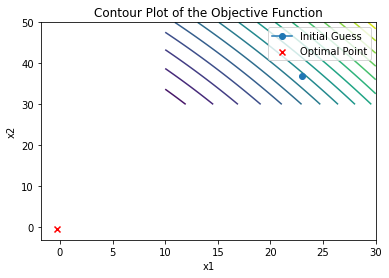

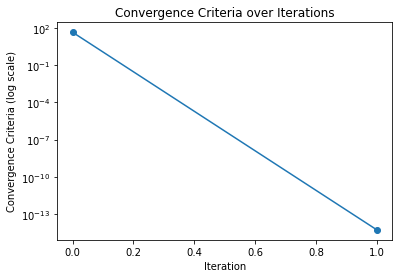

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(z, Q, q, p):
    return 0.5 * np.dot(z, np.dot(Q, z)) + np.dot(q, z) + p

def gradient(z, Q, q):
    return np.dot(Q, z) + q

def hessian(Q):
    return Q

def newton_method(Q, q, p, initial_x, tolerance=1e-6, max_iterations=100):
    x = initial_x
    convergence_criteria = []
    for iteration in range(max_iterations):
        grad = gradient(x, Q, q)
        hess = hessian(Q)
        hess_inv = np.linalg.inv(hess)
        update = np.dot(hess_inv, grad)
        x = x - update
        convergence_criteria.append(np.linalg.norm(update))
        if np.linalg.norm(update) < tolerance:
            break
    return x, objective_function(x, Q, q, p), convergence_criteria

# Given data
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2
initial_x = np.array([23, 37])

# Find optimal point using Newton's method
optimal_point, optimal_value, convergence_criteria = newton_method(Q, q, p, initial_x)

print("Optimal Point:", optimal_point)
print("Optimal Value:", optimal_value)
print("Number of Iterations:", len(convergence_criteria))

# Plot contours of the objective function
x_range = np.linspace(10, 30, 100)
y_range = np.linspace(30, 50, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = objective_function([X[i, j], Y[i, j]], Q, q, p)

plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.scatter(optimal_point[0], optimal_point[1], color='red', marker='x', label='Optimal Point')
plt.plot(initial_x[0], initial_x[1], marker='o', label='Initial Guess')
plt.legend()
plt.title('Contour Plot of the Objective Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plot convergence criteria over iterations
plt.plot(convergence_criteria, marker='o')
plt.yscale('log')
plt.title('Convergence Criteria over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Convergence Criteria (log scale)')
plt.show()


Optimal Point (Original Initial Guess): [-0.29069767 -0.51162791]
Optimal Value (Original Initial Guess): -1.97093023255814
Number of Iterations (Original Initial Guess): 2

Optimal Point (Alternative Initial Guess): [-0.29069767 -0.51162791]
Optimal Value (Alternative Initial Guess): -1.97093023255814
Number of Iterations (Alternative Initial Guess): 2


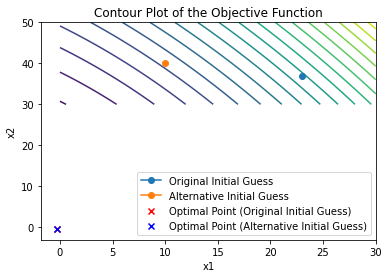

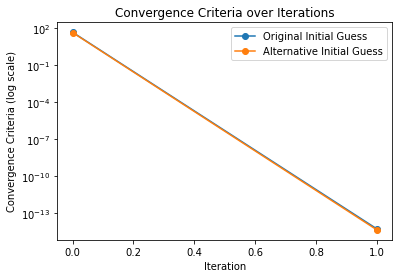

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(z, Q, q, p):
    return 0.5 * np.dot(z, np.dot(Q, z)) + np.dot(q, z) + p

def gradient(z, Q, q):
    return np.dot(Q, z) + q

def hessian(Q):
    return Q

def newton_method(Q, q, p, initial_x, tolerance=1e-6, max_iterations=100):
    x = initial_x
    convergence_criteria = []
    for iteration in range(max_iterations):
        grad = gradient(x, Q, q)
        hess = hessian(Q)
        hess_inv = np.linalg.inv(hess)
        update = np.dot(hess_inv, grad)
        x = x - update
        convergence_criteria.append(np.linalg.norm(update))
        if np.linalg.norm(update) < tolerance:
            break
    return x, objective_function(x, Q, q, p), convergence_criteria

# Given data
Q = np.array([[34, 10], [10, 8]])
q = np.array([15, 7])
p = 2
initial_x = np.array([23, 37])
initial_x_alternative = np.array([10, 40])  # Alternative initial guess

# Find optimal point using Newton's method with the original initial guess
optimal_point, optimal_value, convergence_criteria = newton_method(Q, q, p, initial_x)

print("Optimal Point (Original Initial Guess):", optimal_point)
print("Optimal Value (Original Initial Guess):", optimal_value)
print("Number of Iterations (Original Initial Guess):", len(convergence_criteria))

# Find optimal point using Newton's method with the alternative initial guess
optimal_point_alternative, optimal_value_alternative, convergence_criteria_alternative = newton_method(Q, q, p, initial_x_alternative)

print("\nOptimal Point (Alternative Initial Guess):", optimal_point_alternative)
print("Optimal Value (Alternative Initial Guess):", optimal_value_alternative)
print("Number of Iterations (Alternative Initial Guess):", len(convergence_criteria_alternative))

# Plot contours of the objective function
x_range = np.linspace(0, 30, 100)
y_range = np.linspace(30, 50, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = objective_function([X[i, j], Y[i, j]], Q, q, p)

plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.scatter(optimal_point[0], optimal_point[1], color='red', marker='x', label='Optimal Point (Original Initial Guess)')
plt.scatter(optimal_point_alternative[0], optimal_point_alternative[1], color='blue', marker='x', label='Optimal Point (Alternative Initial Guess)')
plt.plot(initial_x[0], initial_x[1], marker='o', label='Original Initial Guess')
plt.plot(initial_x_alternative[0], initial_x_alternative[1], marker='o', label='Alternative Initial Guess')
plt.legend()
plt.title('Contour Plot of the Objective Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Plot convergence criteria over iterations for both initial guesses
plt.plot(convergence_criteria, marker='o', label='Original Initial Guess')
plt.plot(convergence_criteria_alternative, marker='o', label='Alternative Initial Guess')
plt.yscale('log')
plt.title('Convergence Criteria over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Convergence Criteria (log scale)')
plt.legend()
plt.show()
